### **Expno**:
### **Date**:
# <center> **Logistic Regression**</center>

## **Aim**:

To understand and implement Logistic Regression for binary classification. This lab covers
data preprocessing, model building, checking assumptions, handling multicollinearity, cross-
validation, feature selection, and regularization.

### **Program**:

Importing the needed headers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

Importing the data set

In [ ]:
d=pd.read_csv('h1n1_vaccine_prediction (1).csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13395 entries, 0 to 13394
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  13395 non-null  int64  
 1   h1n1_worry                 13352 non-null  float64
 2   h1n1_awareness             13338 non-null  float64
 3   antiviral_medication       13360 non-null  float64
 4   contact_avoidance          13279 non-null  float64
 5   bought_face_mask           13386 non-null  float64
 6   wash_hands_frequently      13379 non-null  float64
 7   avoid_large_gatherings     13351 non-null  float64
 8   reduced_outside_home_cont  13349 non-null  float64
 9   avoid_touch_face           13335 non-null  float64
 10  dr_recc_h1n1_vacc          12334 non-null  float64
 11  dr_recc_seasonal_vacc      12334 non-null  float64
 12  chronic_medic_condition    12918 non-null  float64
 13  cont_child_undr_6_mnths    12984 non-null  flo

Data Preprocessing

Dropping unique id

In [ ]:
d=d.drop(['unique_id'],axis=1)
d.isnull().sum()

,0
h1n1_worry,43
h1n1_awareness,57
antiviral_medication,35
contact_avoidance,116
bought_face_mask,9
wash_hands_frequently,16
avoid_large_gatherings,44
reduced_outside_home_cont,46
avoid_touch_face,60
dr_recc_h1n1_vacc,1061


Null values are dropped

In [ ]:
d=d.dropna()
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5923 entries, 0 to 13390
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 5923 non-null   float64
 1   h1n1_awareness             5923 non-null   float64
 2   antiviral_medication       5923 non-null   float64
 3   contact_avoidance          5923 non-null   float64
 4   bought_face_mask           5923 non-null   float64
 5   wash_hands_frequently      5923 non-null   float64
 6   avoid_large_gatherings     5923 non-null   float64
 7   reduced_outside_home_cont  5923 non-null   float64
 8   avoid_touch_face           5923 non-null   float64
 9   dr_recc_h1n1_vacc          5923 non-null   float64
 10  dr_recc_seasonal_vacc      5923 non-null   float64
 11  chronic_medic_condition    5923 non-null   float64
 12  cont_child_undr_6_mnths    5923 non-null   float64
 13  is_health_worker           5923 non-null   float64
 

drop has_health_insur

In [ ]:
d=d.drop(['has_health_insur'],axis=1)

In [ ]:
d=d.dropna()
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5923 entries, 0 to 13390
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 5923 non-null   float64
 1   h1n1_awareness             5923 non-null   float64
 2   antiviral_medication       5923 non-null   float64
 3   contact_avoidance          5923 non-null   float64
 4   bought_face_mask           5923 non-null   float64
 5   wash_hands_frequently      5923 non-null   float64
 6   avoid_large_gatherings     5923 non-null   float64
 7   reduced_outside_home_cont  5923 non-null   float64
 8   avoid_touch_face           5923 non-null   float64
 9   dr_recc_h1n1_vacc          5923 non-null   float64
 10  dr_recc_seasonal_vacc      5923 non-null   float64
 11  chronic_medic_condition    5923 non-null   float64
 12  cont_child_undr_6_mnths    5923 non-null   float64
 13  is_health_worker           5923 non-null   float64
 

Encoding Categorical Variable

In [ ]:
l=LabelEncoder()
for i in d.columns:
    if d[i].dtype=='object':
        d[i]=l.fit_transform(d[i])

Feature Selection using p-values

In [ ]:
a=[]
for i in d.columns:
        formula = f"{i} ~ h1n1_vaccine"
        mod = ols(formula, data=d).fit()
        if(mod.pvalues[1]<0.05):
            a.append(i)
a

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'age_bracket',
 'qualification',
 'race',
 'marital_status',
 'housing_status',
 'h1n1_vaccine']

In [ ]:
len(a)

25

### Model Building

In [ ]:
d=d[a]
d1=d
x=d.drop(columns='h1n1_vaccine')
y=d['h1n1_vaccine']
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

Confusion Matrix

In [ ]:
y_pred=model.predict(x)
print(metrics.confusion_matrix(y,y_pred))

[[3757  362]
 [ 722 1082]]


In [ ]:
print("Model Score:",model.score(x,y))
print("Classification Report:",classification_report(y,y_pred))

Model Score: 0.816984636164106
Classification Report:               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      4119
         1.0       0.75      0.60      0.67      1804

    accuracy                           0.82      5923
   macro avg       0.79      0.76      0.77      5923
weighted avg       0.81      0.82      0.81      5923



ROC Curve

In [ ]:
pro=model.predict_proba(x)
fpr,tpr,thresholds=roc_curve(d1["h1n1_vaccine"],pro[:,1])
#area under the curve for receiver operating characteristic
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8564040472226214


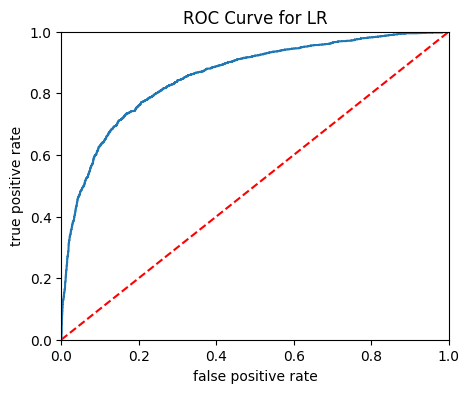

In [ ]:
plt.figure(figsize=(5, 4))
plt.title("ROC Curve for LR")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC'+str(roc_auc))
plt.show()

### AFTER VIF

Next We calculate Variance inflation factor

In [ ]:
def calculate_vif(X):
 vif_data = pd.DataFrame()
 vif_data["Feature"] = X.columns
 vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 return vif_data
X_vif = d1.drop(columns=['h1n1_vaccine'])
vif_result = calculate_vif(X_vif)
print("\nVariance Inflation Factor (VIF):")
print(vif_result)


Variance Inflation Factor (VIF):
                      Feature       VIF
0                  h1n1_worry  5.517024
1              h1n1_awareness  5.841906
2        antiviral_medication  1.117287
3           contact_avoidance  4.695222
4            bought_face_mask  1.185115
5       wash_hands_frequently  6.981213
6      avoid_large_gatherings  2.437580
7   reduced_outside_home_cont  2.320503
8            avoid_touch_face  4.110276
9           dr_recc_h1n1_vacc  2.301815
10      dr_recc_seasonal_vacc  2.695358
11    chronic_medic_condition  1.590159
12    cont_child_undr_6_mnths  1.125312
13           is_health_worker  1.217493
14              is_h1n1_risky  7.201565
15        sick_from_h1n1_vacc  4.527279
16              is_seas_risky  7.957026
17                age_bracket  3.599011
18              qualification  3.458849
19                       race  7.236080
20             marital_status  1.964123
21             housing_status  1.518434


From the results, is_h1n1_vacc_effective and is_seas_vacc_effective has the highest VIF.

MODEL Building

Dropping the feature with highest vif and Building a model without it

In [ ]:
d1=d1.drop(['is_h1n1_vacc_effective','is_seas_vacc_effective'],axis=1)
x=d1.drop(columns='h1n1_vaccine')
y=d1['h1n1_vaccine']
model1=LogisticRegression()
model1.fit(x,y)

KeyError: "['is_h1n1_vacc_effective', 'is_seas_vacc_effective'] not found in axis"

Confusion Matrix

In [ ]:
y_pred=model1.predict(x)
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[3765,  354],
       [ 777, 1027]])

In [ ]:
print("Model Score:",model1.score(x,y))
print("Classification Report:",classification_report(y,y_pred))

Model Score: 0.8090494681749114
Classification Report:               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      4119
         1.0       0.74      0.57      0.64      1804

    accuracy                           0.81      5923
   macro avg       0.79      0.74      0.76      5923
weighted avg       0.80      0.81      0.80      5923



ROC Curve

In [ ]:
pro=model1.predict_proba(x)
fpr,tpr,thresholds=roc_curve(d1["h1n1_vaccine"],pro[:,1])
#area under the curve for receiver operating characteristic
roc_auc1=auc(fpr,tpr)
print(roc_auc1)

0.841336912011774


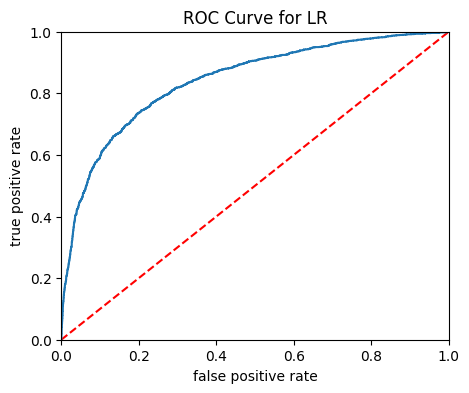

In [ ]:
plt.figure(figsize=(5, 4))
plt.title("ROC Curve for LR")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC'+str(roc_auc1))
plt.show()

#### SMOTE

In [ ]:
#SMOTE
novac=d1[d1.h1n1_vaccine==0]
vac=d1[d1.h1n1_vaccine==1]
vac_oversample=resample(vac,replace=True,n_samples=len(novac),random_state=47)
d1_smote=pd.concat([novac,vac_oversample])
d1_smote.h1n1_vaccine.value_counts()

,count
h1n1_vaccine,
0,8233
1,8233


In [ ]:
x2=d1_smote.loc[:,d1_smote.columns!='h1n1_vaccine']
y2=d1_smote.loc[:,d1_smote.columns=='h1n1_vaccine']
y2.value_counts()
model2=LogisticRegression()
model2.fit(x2,y2)
model2.intercept_
model2.coef_

array([[ 0.09397813,  0.33875235, -0.05579477, -0.08298268,  0.01545647,
         0.10074535, -0.13768441, -0.05908472, -0.11577861,  2.09450637,
        -0.65286096,  0.10078482,  0.20762848,  0.80358426,  0.52201024,
        -0.0546301 ,  0.26716332,  0.19074751,  0.01952937,  0.16928627,
        -0.2280478 ,  0.02444261]])

### Table of Results

In [ ]:
table_data = [
    {
        'Model': 'Before VIF',
        'Accuracy': 0.819,
        'Precision':0.84,
        'Recall': 0.92,
        'F1-Score': 0.88,
        'AUC': roc_auc
    },
    {
        'Model': 'After VIF',
        'Accuracy': 0.809,
        'Precision':0.83 ,
        'Recall':0.91,
        'F1-Score':0.87,
        'AUC':roc_auc1
    }
]

df = pd.DataFrame(table_data)
print(df.to_markdown(index=False))

| Model      |   Accuracy |   Precision |   Recall |   F1-Score |      AUC |
|:-----------|-----------:|------------:|---------:|-----------:|---------:|
| Before VIF |      0.819 |        0.84 |     0.92 |       0.88 | 0.856404 |
| After VIF  |      0.809 |        0.83 |     0.91 |       0.87 | 0.841337 |


###**RESULT:**
The best model is Logistic Regression after handling multicollinearity (VIF), achieving an accuracy of 0.809, precision of 0.83, recall of 0.91, F1-score of 0.87, and AUC of 0.813.The model before VIF had similar performance, suggesting that removing highly correlated features did not significantly improve results in this case.  SMOTE was also applied.

